## Necessary imports

In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# To ignore warnings
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

from utils.data import (
    preprocessing_cyclical_features,
    preprocessing_missing_values,
    temporal_split,
)

warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


# Load configuration from YAML file
with open('../configs/preprocessing_variables.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Access indicators
DUMMY = config['DUMMY_VARIABLES']
DROP = config['DROP_VARIABLES']
CYCLICAL = config['CYCLICAL_VARIABLES']

## Load created dataset

In [2]:
data_folder = Path('../data')
dataset = pd.read_csv(data_folder / 'full_dataset.csv')

dataset.head()

,Date,Close,ln_volume_min,ln_volume_median,ln_volume_max,daily_growth_min,daily_growth_median,daily_growth_max,weekly_growth_min,weekly_growth_median,weekly_growth_max,biweekly_growth_min,biweekly_growth_median,biweekly_growth_max,monthly_growth_min,monthly_growth_median,monthly_growth_max,rel_spread_oc_median,rel_spread_hl_median,vol_10d_mean_median,vol_10d_std_median,vol_10d_min_median,vol_10d_max_median,return_1m,return_2m,...,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods,gdp_us,cpi_us,unemployment_us,interest_us,gdp_de,cpi_de,interest_eu,sp500,vix,dax,spy,gld,vgk,xlv,xlk,xlf,efa,eurusd,usdx,TARGET
0,2020-06-30,9.466011,19.354450,19.817254,20.264685,-0.060907,0.003425,0.035458,-0.034298,0.008902,0.068593,-0.024067,0.037035,0.099208,0.032941,0.120775,0.248356,-0.002655,0.031357,0.003951,0.025593,-0.035301,0.035458,0.070597,0.300408,...,0.0,0.0,0.0,0.0,0.0,19056.617,257.042,11.0,0.08,681793.6,105.9555,0.351459,3100.290039,30.430000,12310.929688,286.325714,167.369995,42.396263,92.454544,100.314537,21.138052,52.544914,1.124720,97.389999,13.489323
1,2020-07-31,10.579280,19.400074,19.704151,20.112023,-0.040747,0.006489,0.034872,-0.035612,0.021164,0.102728,-0.036088,0.046778,0.137892,0.071931,0.115538,0.161729,-0.005839,0.028124,0.004828,0.022646,-0.035301,0.032364,0.117607,0.196506,...,0.0,0.0,0.0,0.0,0.0,20548.793,258.352,10.2,0.09,740949.7,105.1121,0.220885,3271.120117,24.459999,12313.360352,303.188171,185.429993,43.946228,97.499039,106.017166,21.951061,53.563534,1.187225,93.489998,12.495853
2,2020-08-31,13.329807,19.313973,19.838280,20.723134,-0.028213,0.002897,0.066845,-0.033644,0.052272,0.130023,0.047523,0.092004,0.175115,0.065439,0.163070,0.259992,-0.002940,0.031985,0.009196,0.023863,-0.028213,0.054401,0.259992,0.408176,...,0.0,0.0,0.0,0.0,0.0,20548.793,259.316,8.4,0.10,740949.7,105.1121,0.160072,3500.310059,26.410000,12945.379883,324.349701,184.830002,45.841549,100.021278,118.612892,22.891947,56.092800,1.191824,92.139999,13.360715
3,2020-09-30,13.489323,20.052498,20.364709,21.104222,-0.092775,0.009627,0.067321,-0.141829,0.002035,0.123526,-0.131252,-0.004512,0.182254,-0.046609,0.032518,0.278154,0.000403,0.049372,0.000284,0.040437,-0.056209,0.058182,0.011967,0.275070,...,0.0,0.0,0.0,0.0,0.0,20548.793,259.997,7.8,0.09,740949.7,105.1121,0.123464,3363.000000,26.370001,12760.730469,312.204773,177.119995,44.412697,97.840340,112.284752,22.108528,54.944706,1.174205,93.889999,13.019114
4,2020-10-31,12.495853,19.207300,19.646596,20.480455,-0.057458,-0.007170,0.044422,-0.077721,0.006471,0.102567,-0.104166,0.033925,0.151789,-0.089516,0.088317,0.172165,0.007110,0.025488,0.003600,0.023737,-0.040563,0.042578,-0.073649,-0.062563,...,0.0,0.0,0.0,0.0,0.0,20771.691,260.319,6.9,0.09,748115.7,105.3230,0.000361,3269.959961,38.020000,11556.480469,304.420471,176.199997,42.006969,94.297035,106.665718,21.915642,52.993801,1.167870,94.040001,12.954044


## Apply pre-processing steps

In [3]:
dataset = preprocessing_missing_values(dataset)

------------------------ 

 Columns to handle with missing values:  ['trailing_PEG', 'dividendYield', 'esg_env', 'esg_soc', 'esg_gov', 'days_to_next_earnings', 'dividend_stability'] 


Before imputation:
 trailing_PEG              60
dividendYield            457
esg_env                  180
esg_soc                  180
esg_gov                  180
days_to_next_earnings     60
dividend_stability       457
dtype: int64
After imputation:
 trailing_PEG             0
dividendYield            0
esg_env                  0
esg_soc                  0
esg_gov                  0
days_to_next_earnings    0
dividend_stability       0
dtype: int64


In [4]:
for variable in CYCLICAL:
    dataset = preprocessing_cyclical_features(dataset, variable)

Applying cyclical transformation to the 'month' variable...

   month     month_sin     month_cos
0      6  1.224647e-16 -1.000000e+00
1      7 -5.000000e-01 -8.660254e-01
2      8 -8.660254e-01 -5.000000e-01
3      9 -1.000000e+00 -1.836970e-16
4     10 -8.660254e-01  5.000000e-01


In [5]:
dataset.shape

(1417, 184)

In [6]:
dataset = pd.get_dummies(dataset, columns=DUMMY, drop_first=True)

In [7]:
dataset.head()

,Date,Close,ln_volume_min,ln_volume_median,ln_volume_max,daily_growth_min,daily_growth_median,daily_growth_max,weekly_growth_min,weekly_growth_median,weekly_growth_max,biweekly_growth_min,biweekly_growth_median,biweekly_growth_max,monthly_growth_min,monthly_growth_median,monthly_growth_max,rel_spread_oc_median,rel_spread_hl_median,vol_10d_mean_median,vol_10d_std_median,vol_10d_min_median,vol_10d_max_median,return_1m,return_2m,...,ticker_PEP,ticker_PLTR,ticker_SHOP,ticker_TMUS,ticker_TSLA,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Healthcare,sector_Technology,industry_Auto Manufacturers,industry_Beverages - Non-Alcoholic,industry_Communication Equipment,industry_Consumer Electronics,industry_Discount Stores,industry_Drug Manufacturers - General,industry_Entertainment,industry_Internet Content & Information,industry_Internet Retail,industry_Semiconductor Equipment & Materials,industry_Semiconductors,industry_Software - Application,industry_Software - Infrastructure,industry_Specialty Chemicals,industry_Telecom Services
0,2020-06-30,9.466011,19.354450,19.817254,20.264685,-0.060907,0.003425,0.035458,-0.034298,0.008902,0.068593,-0.024067,0.037035,0.099208,0.032941,0.120775,0.248356,-0.002655,0.031357,0.003951,0.025593,-0.035301,0.035458,0.070597,0.300408,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2020-07-31,10.579280,19.400074,19.704151,20.112023,-0.040747,0.006489,0.034872,-0.035612,0.021164,0.102728,-0.036088,0.046778,0.137892,0.071931,0.115538,0.161729,-0.005839,0.028124,0.004828,0.022646,-0.035301,0.032364,0.117607,0.196506,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,2020-08-31,13.329807,19.313973,19.838280,20.723134,-0.028213,0.002897,0.066845,-0.033644,0.052272,0.130023,0.047523,0.092004,0.175115,0.065439,0.163070,0.259992,-0.002940,0.031985,0.009196,0.023863,-0.028213,0.054401,0.259992,0.408176,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2020-09-30,13.489323,20.052498,20.364709,21.104222,-0.092775,0.009627,0.067321,-0.141829,0.002035,0.123526,-0.131252,-0.004512,0.182254,-0.046609,0.032518,0.278154,0.000403,0.049372,0.000284,0.040437,-0.056209,0.058182,0.011967,0.275070,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,2020-10-31,12.495853,19.207300,19.646596,20.480455,-0.057458,-0.007170,0.044422,-0.077721,0.006471,0.102567,-0.104166,0.033925,0.151789,-0.089516,0.088317,0.172165,0.007110,0.025488,0.003600,0.023737,-0.040563,0.042578,-0.073649,-0.062563,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


## Create variable to PREDICT

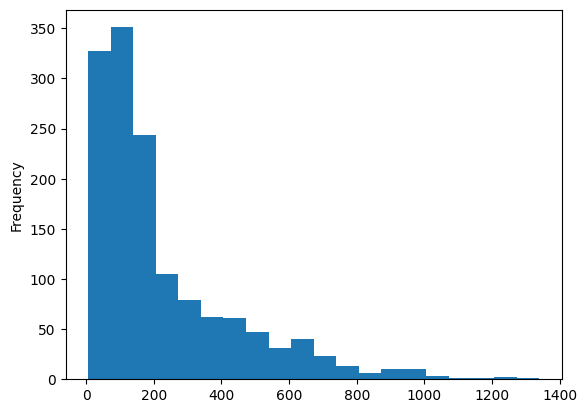

In [8]:
dataset.TARGET.plot(kind='hist', bins=20);

In [9]:
dataset['is_positive_growth_3m_future'] = dataset.apply(
    lambda row: 1 if (row['TARGET'] >= row['Close'] * 1.10) else 0,
    axis=1
)

In [10]:
# PREDICT variable distribution
dataset['is_positive_growth_3m_future'].value_counts()

is_positive_growth_3m_future
0    880
1    537
Name: count, dtype: int64

In [11]:
# Add columns you want to exclude
corr_table = dataset.drop(columns=DROP).corr()['is_positive_growth_3m_future']

# and show the 24 (25 minus itself) most correlated variables
corr_table.sort_values(ascending=False).head(25)

is_positive_growth_3m_future    1.000000
beta                            0.144449
current_ratio                   0.129609
working_capital_ratio           0.126550
interest_us                     0.124272
free_cf_margin                  0.115998
cash_ratio                      0.112748
priceToBook                     0.090860
industry_Semiconductors         0.089386
interest_eu                     0.087885
forwardPE                       0.087564
biweekly_growth_max             0.082895
gld                             0.082683
ln_volume_max                   0.082005
ticker_NVDA                     0.081355
ln_volume_min                   0.079167
recent_rating_changes           0.077232
daily_growth_max                0.075742
ln_volume_median                0.074936
weekly_growth_max               0.074453
ticker_AVGO                     0.074131
trailingPE                      0.073620
cpi_de                          0.072724
esg_gov                         0.072450
operating_cf_mar

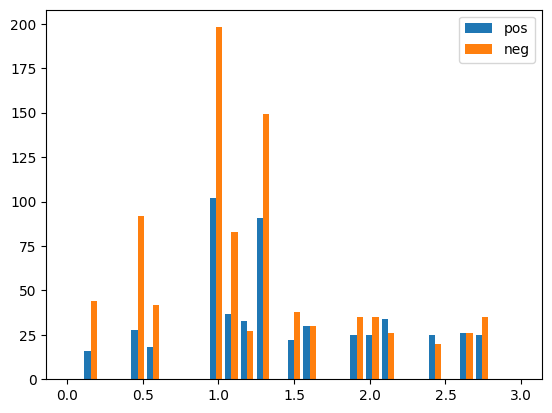

In [12]:
# Visualize the distribution of top-correlated variable per actual label

x = dataset["beta"][dataset['is_positive_growth_3m_future'] == 1]
y = dataset["beta"][dataset['is_positive_growth_3m_future'] == 0]
bins = np.linspace(0, 3, 30)

plt.hist([x, y], bins, label=['pos', 'neg'])
plt.legend(loc='upper right')
plt.show()

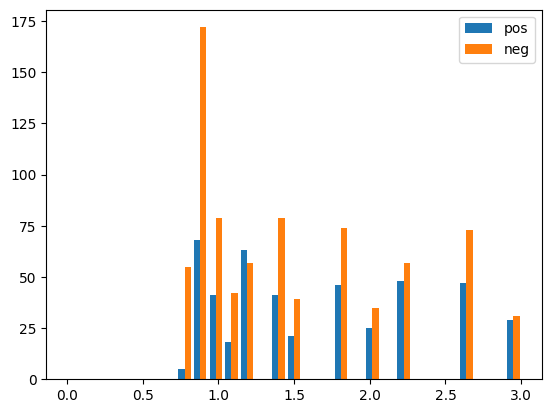

In [13]:
# Visualize the distribution of second most correlated variable per actual label

x = dataset["current_ratio"][dataset['is_positive_growth_3m_future'] == 1]
y = dataset["current_ratio"][dataset['is_positive_growth_3m_future'] == 0]
bins = np.linspace(0, 3, 30)

plt.hist([x, y], bins, label=['pos', 'neg'])
plt.legend(loc='upper right')
plt.show()

## Create temporal split

In [14]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

min_date_df = dataset.Date.min()
max_date_df = dataset.Date.max()

dataset_split = temporal_split(dataset,
                                 min_date = min_date_df,
                                 max_date = max_date_df)
     
dataset_split['split'].value_counts()

split
train         985
validation    216
test          216
Name: count, dtype: int64

In [15]:
DROP

['Date', 'TARGET', 'companyName', 'country']

In [16]:
dataset.drop(columns=DROP, inplace=True)
dataset.shape

(1417, 222)

## Store data

In [17]:
# Define the folder path
notebook_dir = Path().resolve()

# Check if the 'data' folder exists, if not, create it
data_dir = notebook_dir.parent / 'data'
data_dir.mkdir(exist_ok=True)

# Define the file path for the CSV
data_path = data_dir / 'dataset_for_modeling.csv'

# Save the full_dataset as a CSV file
dataset.to_csv(data_path, index=False)

print(f"Dataset saved to {data_path.relative_to(notebook_dir.parent.parent)}")

Dataset saved to stock-markets-analytics-zoomcamp-project-by-sk/data/dataset_for_modeling.csv


In [18]:
print("That's all, folks!")

That's all, folks!
